# Visualisation des données avec matplotlib/seaborn
Dataset : https://www.kaggle.com/datasnaek/chess

**Tous vos graphiques et leurs axes doivent avoir des titres. Ils doivent être lisibles (taille, couleurs, etc.)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 3)
# sns.set(rc={"figure.figsize":(12, 3)})

# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("lichess_data.csv")

*   Afficher deux histogrammes représentant la distribution du nombre de tours: avec la valeur de l'argument `bins` par défaut et choisi par vous.
*   Afficher des histogrammes représentant la distribution du nombre de tours par classe d'ouverture (A, B, C, ...) - sur le même graphique (cf. argument `hue`). L'affichage souhaité : barres des histogrammes des classes d'ouverture différentes à côté les une des autres.
*   Afficher des histogrammes représentant la distribution du nombre de tours par classe d'ouverture (A, B, C, ...) - sur des graphiques voisins (cf. `sns.FacetGrid`).

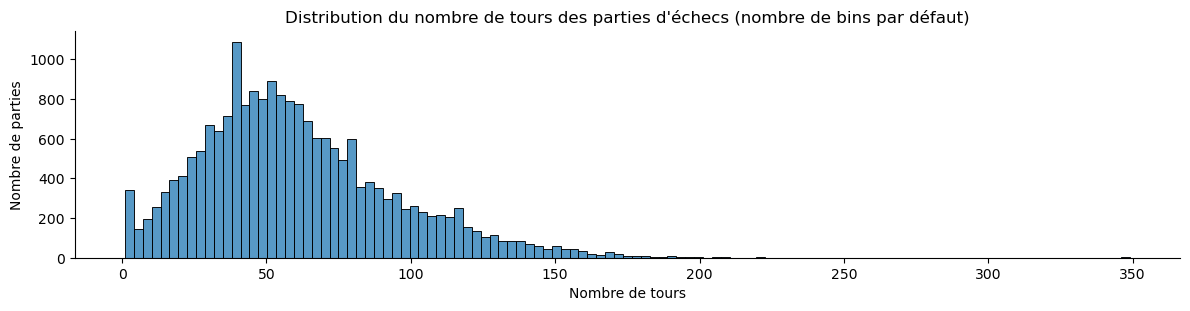

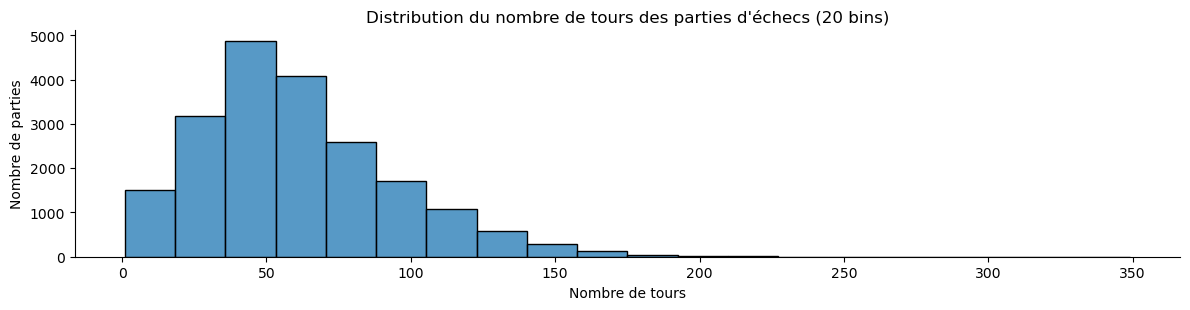

In [4]:
# Afficher deux histogrammes représentant la distribution du nombre de tours: 
# avec la valeur de l'argument `bins` par défaut et choisi par vous.
g = sns.displot(x='turns', data=data, kind='hist', height=3, aspect=4)
g.set(
    title='Distribution du nombre de tours des parties d\'échecs (nombre de bins par défaut)',
    xlabel='Nombre de tours',
    ylabel='Nombre de parties')
g = sns.displot(x='turns', data=data, kind='hist', bins=20, height=3, aspect=4)
g.set(
    title='Distribution du nombre de tours des parties d\'échecs (20 bins)',
    xlabel='Nombre de tours',
    ylabel='Nombre de parties')
plt.show()

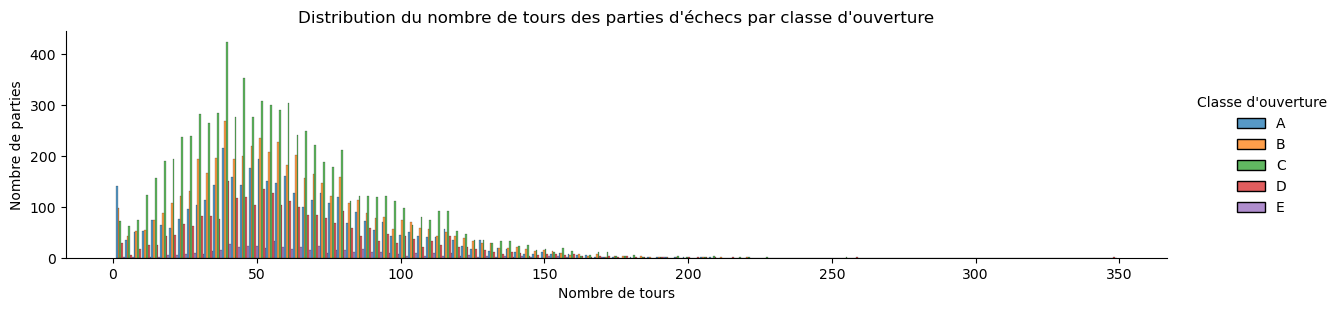

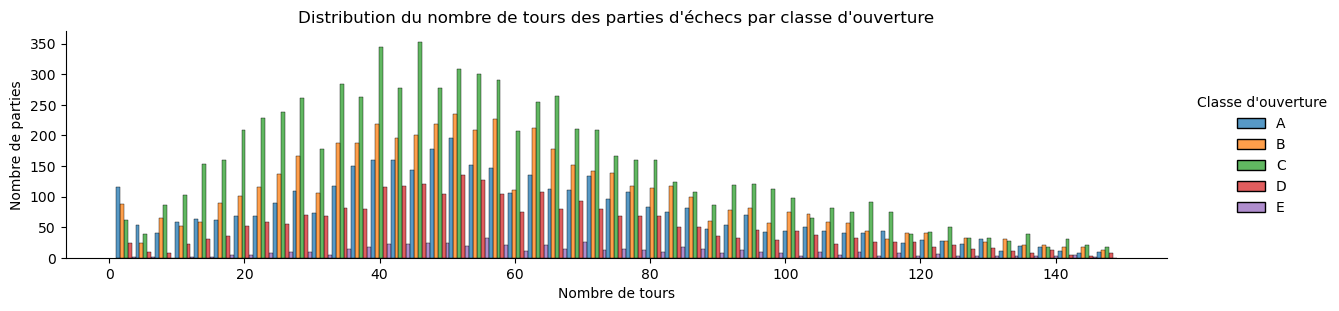

In [5]:
# Afficher des histogrammes représentant la distribution du nombre de tours 
# par classe d'ouverture (A, B, C, ...) - sur le même graphique (cf. argument `hue`). 
# L'affichage souhaité : barres des histogrammes des classes d'ouverture différentes à côté les une des autres.
opening_class = data.opening_eco.str[0].rename('Classe d\'ouverture')
opening_class_levels = sorted(list(set(opening_class)))
g = sns.displot(x='turns', data=data, hue=opening_class, hue_order=opening_class_levels,
                multiple="dodge", height=3, aspect=4)
g.set(
    title='Distribution du nombre de tours des parties d\'échecs par classe d\'ouverture',
    xlabel='Nombre de tours',
    ylabel='Nombre de parties')

cond = data.turns < 150
g = sns.displot(x='turns', data=data[cond], hue=opening_class[cond], hue_order=opening_class_levels,
                multiple="dodge", height=3, aspect=4)
g.set(
    title='Distribution du nombre de tours des parties d\'échecs par classe d\'ouverture',
    xlabel='Nombre de tours',
    ylabel='Nombre de parties')

plt.show()

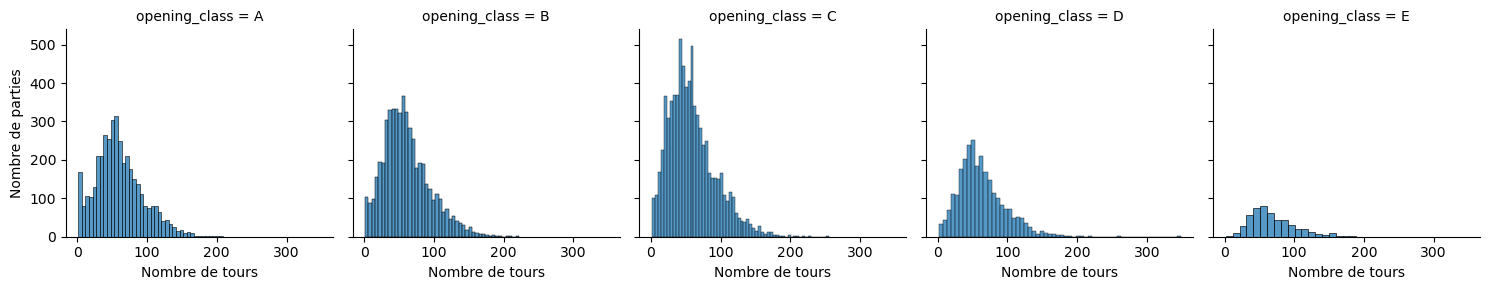

In [6]:
# Afficher des histogrammes représentant la distribution du nombre de tours 
# par classe d'ouverture (A, B, C, ...) - sur des graphiques voisins (cf. `sns.FacetGrid`).
data['opening_class'] = opening_class
g = sns.FacetGrid(data, col='opening_class', col_order=opening_class_levels)
g.set_titles(col_template=r"Classe d'ouverture = {col_name}")
p = g.map(sns.histplot, 'turns')
g.set_axis_labels(x_var="Nombre de tours", y_var="Nombre de parties")
plt.show()

*   Afficher un nuage de points représentant la relation entre le score des joueurs jouant les uns contre les autres. Différencier les points par les valeurs de la variable `rated`.
*   Afficher le graphique précédent avec uniquement des parties de 10 minutes par joueur (`'increment_code'`: 10+..) avec la classe d'ouverture A.



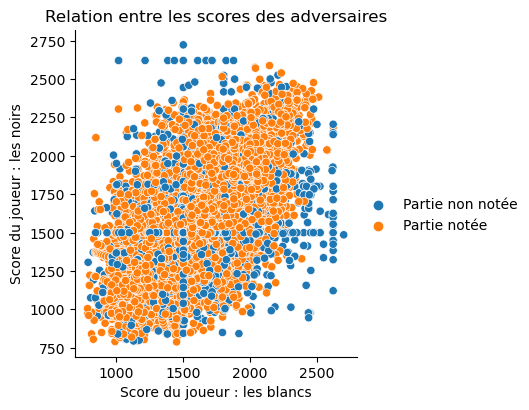

In [7]:
# Afficher un nuage de points représentant la relation entre le score 
# des joueurs jouant les uns contre les autres. 
# Différencier les points par les valeurs de la variable rated.
hue_vector = data.rated.map({False: 'Partie non notée', True: 'Partie notée'}).rename('')
g = sns.relplot(data=data, x='white_rating', y='black_rating', hue=hue_vector, kind='scatter', height=4, aspect=1)
g.set(
    title='Relation entre les scores des adversaires',
    xlabel='Score du joueur : les blancs',
    ylabel='Score du joueur : les noirs')
plt.show()

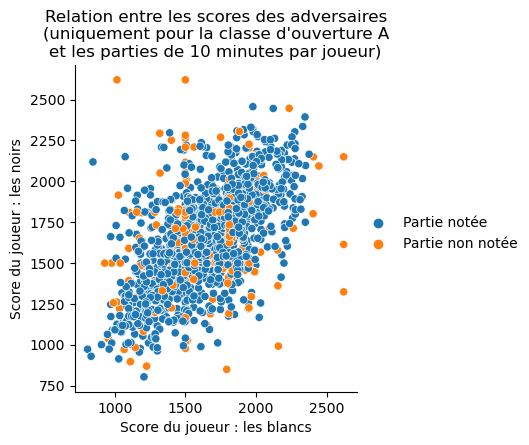

In [8]:
# Afficher le graphique précédent avec uniquement des parties de 10 minutes par joueur 
# ('increment_code': 10+..) avec la classe d'ouverture A.
df_plt = data[(data.increment_code.str.startswith('10+')) & (data.opening_class == 'A')]
hue_vector = df_plt.rated.map({False: 'Partie non notée', True: 'Partie notée'}).rename('')
g = sns.relplot(data=df_plt, x='white_rating', y='black_rating', hue=hue_vector, kind='scatter', height=4, aspect=1)
g.set(
    title="Relation entre les scores des adversaires\n(uniquement pour la classe d'ouverture A\net les parties de 10 minutes par joueur)",
    xlabel='Score du joueur : les blancs',
    ylabel='Score du joueur : les noirs')
plt.show()

*   Afficher la distribution (box plot) du nombre de tours par classe d'ouverture
*   Afficher la distribution (box plot) du nombre de tours par ouverture pour 5 ouvertures les plus populaires.

In [1]:
# Afficher la distribution (box plot) du nombre de tours par classe d'ouverture
g = sns.catplot(data=data, x='opening_class', y='turns', kind='box', order=opening_class_levels, height=6, aspect=2)
g.set(
    title="Distribution du nombre de tours par classe d'ouverture",
    xlabel='Classe d\'ouverture',
    ylabel='Nombre de tours')
plt.show()

NameError: name 'sns' is not defined

A00    1007
C00     844
D00     739
B01     716
C41     691
Name: opening_eco, dtype: int64

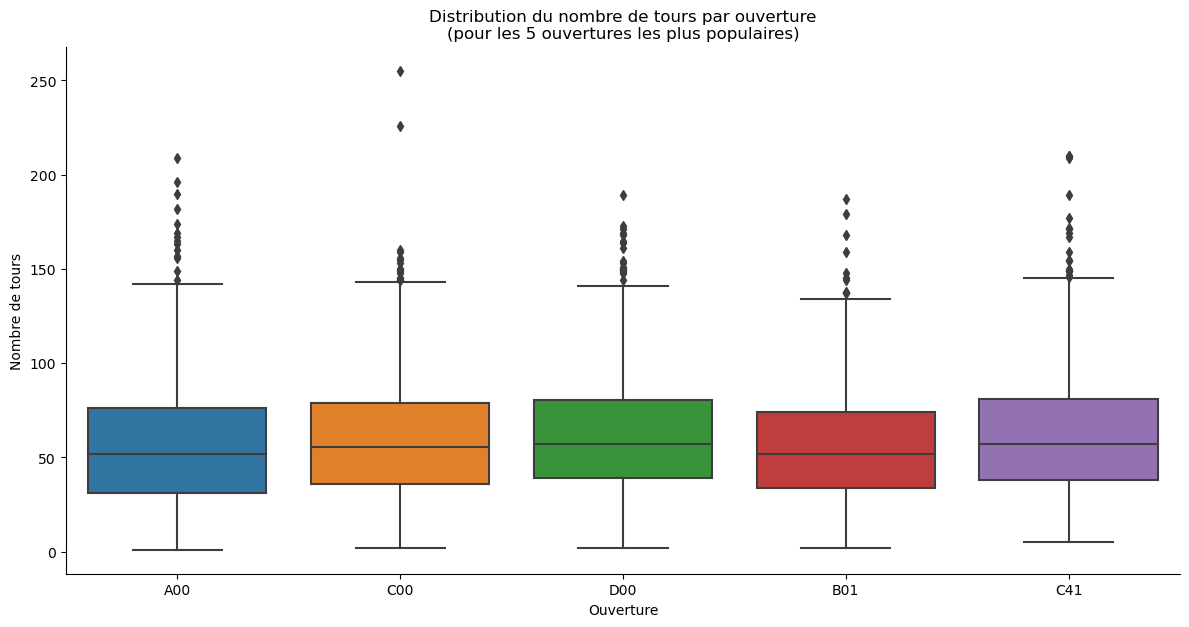

In [10]:
# Afficher la distribution (box plot) du nombre de tours par ouverture 
# pour les 5 ouvertures les plus populaires.
openings_top = data.opening_eco.value_counts().nlargest(5)
display(openings_top)
df_plot = data[data.opening_eco.isin(openings_top.index)] 
g = sns.catplot(data=df_plot, x='opening_eco', y='turns', kind='box', order=openings_top.index, height=6, aspect=2)
g.set(
    title="Distribution du nombre de tours par ouverture\n(pour les 5 ouvertures les plus populaires)",
    xlabel='Ouverture',
    ylabel='Nombre de tours')
plt.show()

*   Afficher l'évolution du score dans le temps pour un joueur de votre choix. L'axe du temps doit être construit à partir de la variable `last_move_at` qui doit être transformée : ses valeurs correspondent au nombre de millisecondes depuis le 01/01/1970 00:00:00 GMT (cf. librairie datetime).
*   Afficher l'évolution du score dans le temps pour le joueur qui a joué le plus de parties (avec les blancs ou avec les noirs) avec des ouvertures de classe A.



In [11]:
# Les valeurs de la variable last_move_at correspondent au nombre de millisecondes 
# depuis le 01/01/1970 00:00:00 GMT (cf. librairie datetime).

import datetime
def get_player_rating(data, player_id):
    wr = data.loc[data['white_id'] == player_id, ['last_move_at', 'white_rating']].rename(columns={"white_rating": "rating"})
    br = data.loc[data['black_id'] == player_id, ['last_move_at', 'black_rating']].rename(columns={"black_rating": "rating"})
    df_plot = pd.concat([wr, br]).sort_values(by='last_move_at')
    df_plot['rating_dt'] = (df_plot['last_move_at']/1000).apply(datetime.datetime.fromtimestamp)
    df_plot = df_plot.drop(columns=['last_move_at'])
    return df_plot

get_player_rating(data, "a_p_t_e_m_u_u")

,rating,rating_dt
1605,1279,2017-08-28 10:46:40.000
1604,1299,2017-08-28 10:46:40.000
1603,1296,2017-08-28 13:33:20.000
1602,1290,2017-08-28 13:33:20.000
1600,1276,2017-08-28 13:33:20.000
...,...,...
14759,1355,2017-09-02 10:20:33.238
14758,1347,2017-09-02 10:22:31.697
13140,1347,2017-09-02 10:22:31.697
14757,1340,2017-09-02 10:35:40.693


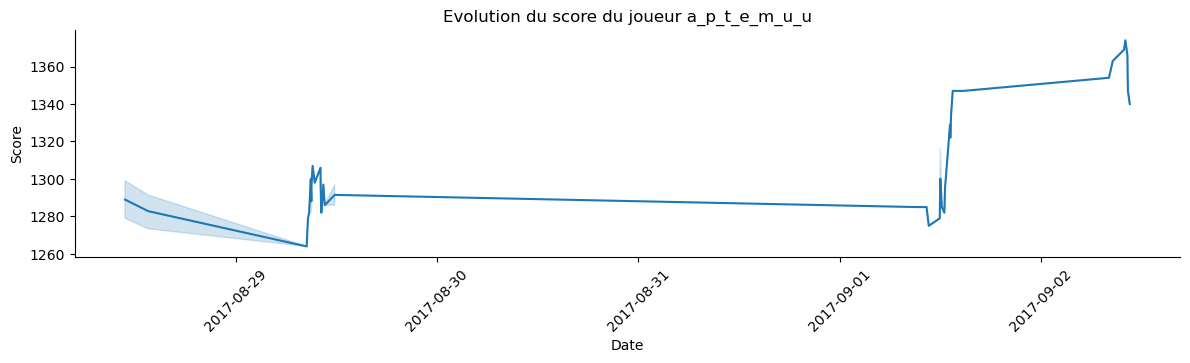

In [12]:
# Afficher l'évolution du score dans le temps pour un joueur de votre choix. 
player_id = "a_p_t_e_m_u_u"

g = sns.relplot(data=get_player_rating(data, player_id), x='rating_dt', y='rating', kind='line', height=3, aspect=4)
g.set(
    title=f"Evolution du score du joueur {player_id}",
    xlabel='Date',
    ylabel='Score')
g.set_xticklabels(rotation=45)
plt.show()

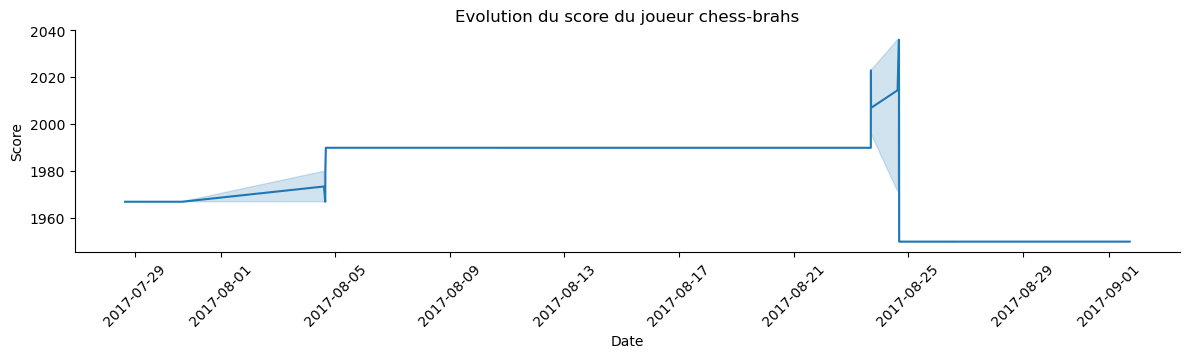

In [13]:
# Afficher l'évolution du score dans le temps pour le joueur 
# qui a joué le plus de parties (avec les blancs ou avec les noirs) 
# avec des ouvertures de classe A.

df_A = data[data.opening_class == 'A']
players = pd.merge(df_A.white_id.value_counts(), df_A.black_id.value_counts(), how='outer', left_index=True, right_index=True).fillna(0)
players = players.assign(total_games = players.white_id + players.black_id)
players = players['total_games'].sort_values(ascending = False)
# display(players.head())
player_id = players.index[0]

g = sns.relplot(data=get_player_rating(data, player_id), x='rating_dt', y='rating', kind='line', height=3, aspect=4)
g.set(
    title=f"Evolution du score du joueur {player_id}",
    xlabel='Date',
    ylabel='Score')
g.set_xticklabels(rotation=45)
plt.show()

In [14]:
# cols_white = ['white_id', 'white_rating', 'last_move_at']
# cols_black = ['black_id', 'black_rating', 'last_move_at']
# cols = ['player_id', 'rating', 'last_move_at']

# players_white = data[cols_white].rename(columns=dict(zip(cols_white,cols)))
# players_black = data[cols_black].rename(columns=dict(zip(cols_black,cols)))
# players = pd.concat([players_white, players_black])
# # display(players)

# player_id = players.groupby('player_id').agg({'last_move_at': lambda x: max(x)-min(x)})['last_move_at'].nlargest(1).index[0]
# g = sns.relplot(data=get_player_rating(data, player_id), x='rating_dt', y='rating', kind='line', height=3, aspect=4)
# g.set(
#     title=f"Evolution du score du joueur {player_id}",
#     xlabel='Date',
#     ylabel='Score')
# g.set_xticklabels(rotation=45)
# plt.show()

Afficher le nombre total de parties jouées et le pourcentage des victoires des blancs par classe d'ouverture - sur deux graphiques voisins.


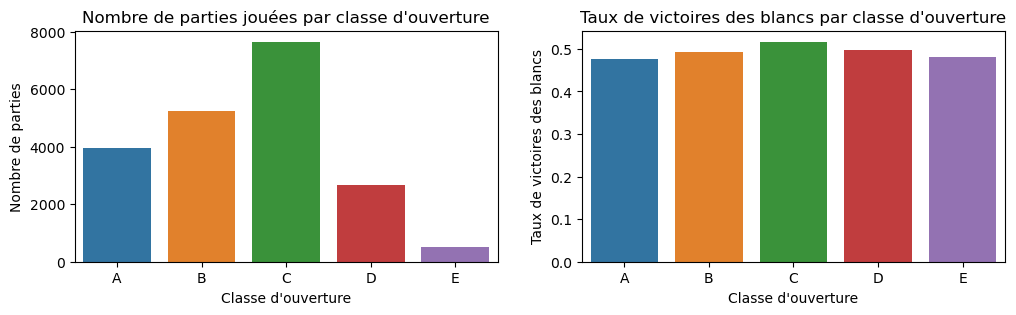

In [15]:
# Afficher le nombre total de parties jouées et le pourcentage 
# des victoires des blancs par classe d'ouverture - sur deux graphiques voisins.

df_plot = data.groupby(['opening_class'], as_index=False).agg(
    nb_games = ('opening_class', 'size'),
    white_win_rate = ('winner', lambda x: np.mean(x=='white'))).\
    sort_values(by='opening_class')

_, axs = plt.subplots(ncols = 2)
g = sns.barplot(data=df_plot, x='opening_class', y='nb_games', ax=axs[0])
g.set(
    title=f"Nombre de parties jouées par classe d'ouverture",
    xlabel="Classe d'ouverture",
    ylabel="Nombre de parties")
g = sns.barplot(data=df_plot, x='opening_class', y='white_win_rate', ax=axs[1])
g.set(
    title=f"Taux de victoires des blancs par classe d'ouverture",
    xlabel="Classe d'ouverture",
    ylabel="Taux de victoires des blancs")
plt.show()

Afficher la distribution de la moyenne des scores des adversaires par classe d'ouverture. Les classes d'ouvertures doivent être affichées sur le graphique dans l'ordre alphabétique des codes correspondants et les noms complets des classe doivent apparaître sur l'axe correspondant au lieu des codes (faites attention à la rotation assurant la lisibilité). 

*   A: Flank openings
*   B: Semi-open games (~French Defence)
*   C: Open games (+French Defence)
*   D: Closed and semi-closed games
*   E: Indian defences



In [16]:
openings = {
    'A': 'Flank openings',
    'B': 'Semi-open games (~French Defence)',
    'C': 'Open games (+French Defence)',
    'D': 'Closed and semi-closed games',
    'E': 'Indian defences'
} 

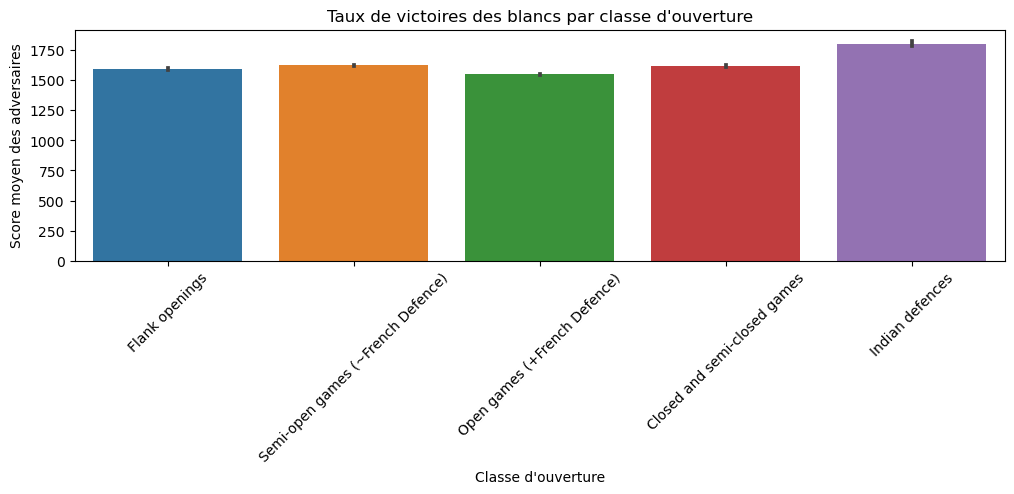

In [17]:
rating_mean = (data.white_rating + data.black_rating) / 2
g = sns.barplot(data=data, x='opening_class', y=rating_mean, order=openings.keys())
g.set(
    title=f"Taux de victoires des blancs par classe d'ouverture",
    xlabel="Classe d'ouverture",
    ylabel="Score moyen des adversaires")
g.set_xticklabels(labels=openings.values(), rotation=45)
plt.show()